In [3]:
import pandas as pd

# 导入数据

In [3]:
df1 = pd.read_excel('/Users/allenygy/Desktop/WorkSpace/VScode-Workspace/CODE/Python/国赛/Data/1.xlsx')
df2 = pd.read_excel('/Users/allenygy/Desktop/WorkSpace/VScode-Workspace/CODE/Python/国赛/Data/2.xlsx')
# df3 = pd.read_excel('3.xlsx')
# df4 = pd.read_excel('4.xlsx')

## 合并附件一二

In [4]:
# 提取第一个表中的 "单品编码"、"单品名称" 和 "分类名称" 列
df1_subset = df1[['单品编码', '单品名称', '分类名称']]

# 使用 merge 函数将两个表根据 "单品编码" 列合并
merged_df = df2.merge(df1_subset, left_on='单品编码', right_on='单品编码', how='left')

# 打印合并后的结果
print(merged_df)


             销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型  \
0      2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售   
1      2020-07-01  09:17:27.295  102900005115960   0.849         3.2   销售   
2      2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售   
3      2020-07-01  09:19:45.450  102900005115823   0.421        10.0   销售   
4      2020-07-01  09:20:23.686  102900005115908   0.539         8.0   销售   
...           ...           ...              ...     ...         ...  ...   
878498 2023-06-30  21:35:13.264  102900005115250   0.284        24.0   销售   
878499 2023-06-30  21:35:14.358  102900011022764   0.669        12.0   销售   
878500 2023-06-30  21:35:20.264  102900005115250   0.125        24.0   销售   
878501 2023-06-30  21:35:21.509  102900011016701   0.252         5.2   销售   
878502 2023-06-30  21:40:48.248  102900011022764   0.803        12.0   销售   

       是否打折销售     单品名称 分类名称  
0           否  泡泡椒(精品)  辣椒类  
1           否  

In [5]:
merged_df.to_excel('Result.xlsx', index=False)

In [29]:
df = pd.read_excel('Result-process.xlsx')
df

,销售日期,单品名称,销售单价(元/千克),销量,分类名称,销售类型,销量(千克)
0,2020-07-01,七彩椒(1),16.0,1.909,辣椒类,销售,1.909
1,2020-07-01,上海青,10.0,11.476,花叶类,销售,11.476
2,2020-07-01,上海青,10.0,11.476,花叶类,退货,-11.476
3,2020-07-01,云南油麦菜,6.0,32.579,花叶类,销售,32.579
4,2020-07-01,云南油麦菜,6.0,32.579,花叶类,退货,-32.579
...,...,...,...,...,...,...,...
99587,2023-06-30,高瓜(1),16.0,1.210,水生根茎类,退货,-1.210
99588,2023-06-30,高瓜(2),10.8,0.228,水生根茎类,销售,0.228
99589,2023-06-30,高瓜(2),10.8,0.228,水生根茎类,退货,-0.228
99590,2023-06-30,高瓜(2),18.0,0.284,水生根茎类,销售,0.284


# 新建一列 年-月

In [64]:
# 将销售日期转换为日期时间对象
df['销售日期'] = pd.to_datetime(df['销售日期'])

# 提取年份和月份
df['年份'] = df['销售日期'].dt.year
df['月份'] = df['销售日期'].dt.month
df['日期'] = df['销售日期'].dt.date


df['年-月'] = df['年份'].astype(str) + '-' + df['月份'].astype(str)
df.head()

,销售日期,单品名称,销售单价(元/千克),销量,分类名称,销售类型,销量(千克),年份,月份,日期,年-月
0,2020-07-01,七彩椒(1),16.0,1.909,辣椒类,销售,1.909,2020,7,2020-07-01,2020-7
1,2020-07-01,上海青,10.0,11.476,花叶类,销售,11.476,2020,7,2020-07-01,2020-7
2,2020-07-01,上海青,10.0,11.476,花叶类,退货,-11.476,2020,7,2020-07-01,2020-7
3,2020-07-01,云南油麦菜,6.0,32.579,花叶类,销售,32.579,2020,7,2020-07-01,2020-7
4,2020-07-01,云南油麦菜,6.0,32.579,花叶类,退货,-32.579,2020,7,2020-07-01,2020-7


# 新建年-月-单品/品类

In [65]:
df['年-月-单品'] = df['年-月'] + '-' + df['单品名称']
df['年-月-品类'] = df['年-月'] + '-' + df['分类名称']
df.head()

,销售日期,单品名称,销售单价(元/千克),销量,分类名称,销售类型,销量(千克),年份,月份,日期,年-月,年-月-单品,年-月-品类
0,2020-07-01,七彩椒(1),16.0,1.909,辣椒类,销售,1.909,2020,7,2020-07-01,2020-7,2020-7-七彩椒(1),2020-7-辣椒类
1,2020-07-01,上海青,10.0,11.476,花叶类,销售,11.476,2020,7,2020-07-01,2020-7,2020-7-上海青,2020-7-花叶类
2,2020-07-01,上海青,10.0,11.476,花叶类,退货,-11.476,2020,7,2020-07-01,2020-7,2020-7-上海青,2020-7-花叶类
3,2020-07-01,云南油麦菜,6.0,32.579,花叶类,销售,32.579,2020,7,2020-07-01,2020-7,2020-7-云南油麦菜,2020-7-花叶类
4,2020-07-01,云南油麦菜,6.0,32.579,花叶类,退货,-32.579,2020,7,2020-07-01,2020-7,2020-7-云南油麦菜,2020-7-花叶类


In [68]:
# 将销售日期和单品名称作为分类依据，并计算销售总量
result = df.groupby(['销售日期', '单品名称'])['销量(千克)'].sum().reset_index()

# 合并结果表和原始表，保留额外的列信息
result = result.merge(df[['销售日期', '单品名称', '销售单价(元/千克)','年-月-品类']], on=['销售日期', '单品名称'], how='left')
# 删除DataFrame中的重复行
df = result.drop_duplicates()

df.head()
# 打印删除重复行后的DataFrame
print(df)



            销售日期        单品名称  销量(千克)             年-月-单品        年-月-品类
0     2020-07-01      七彩椒(1)   1.909      2020-7-七彩椒(1)    2020-7-辣椒类
1     2020-07-01         上海青   0.000         2020-7-上海青    2020-7-花叶类
3     2020-07-01       云南油麦菜   0.000       2020-7-云南油麦菜    2020-7-花叶类
5     2020-07-01        云南生菜   0.000        2020-7-云南生菜    2020-7-花叶类
7     2020-07-01        外地茼蒿   2.623        2020-7-外地茼蒿    2020-7-花叶类
...          ...         ...     ...                ...           ...
99576 2023-06-30      金针菇(盒)   0.000      2023-6-金针菇(盒)    2023-6-食用菌
99580 2023-06-30         长线茄   0.000         2023-6-长线茄     2023-6-茄类
99582 2023-06-30  青红杭椒组合装(份)   0.000  2023-6-青红杭椒组合装(份)    2023-6-辣椒类
99584 2023-06-30       高瓜(1)   0.000       2023-6-高瓜(1)  2023-6-水生根茎类
99588 2023-06-30       高瓜(2)   0.000       2023-6-高瓜(2)  2023-6-水生根茎类

[46599 rows x 5 columns]


In [71]:
df[['年份', '月份', '品类名称']] = df['年-月-品类'].str.split('-', expand=True)
df.head()
print(df)

            销售日期        单品名称  销量(千克)             年-月-单品        年-月-品类    年份  \
0     2020-07-01      七彩椒(1)   1.909      2020-7-七彩椒(1)    2020-7-辣椒类  2020   
1     2020-07-01         上海青   0.000         2020-7-上海青    2020-7-花叶类  2020   
3     2020-07-01       云南油麦菜   0.000       2020-7-云南油麦菜    2020-7-花叶类  2020   
5     2020-07-01        云南生菜   0.000        2020-7-云南生菜    2020-7-花叶类  2020   
7     2020-07-01        外地茼蒿   2.623        2020-7-外地茼蒿    2020-7-花叶类  2020   
...          ...         ...     ...                ...           ...   ...   
99576 2023-06-30      金针菇(盒)   0.000      2023-6-金针菇(盒)    2023-6-食用菌  2023   
99580 2023-06-30         长线茄   0.000         2023-6-长线茄     2023-6-茄类  2023   
99582 2023-06-30  青红杭椒组合装(份)   0.000  2023-6-青红杭椒组合装(份)    2023-6-辣椒类  2023   
99584 2023-06-30       高瓜(1)   0.000       2023-6-高瓜(1)  2023-6-水生根茎类  2023   
99588 2023-06-30       高瓜(2)   0.000       2023-6-高瓜(2)  2023-6-水生根茎类  2023   

      月份   品类名称  
0      7    辣椒类  
1      7    花叶类

/var/folders/l_/t15z68h5545gnmg_nk6tn8r00000gn/T/ipykernel_19820/477378107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['年份', '月份', '品类名称']] = df['年-月-品类'].str.split('-', expand=True)
/var/folders/l_/t15z68h5545gnmg_nk6tn8r00000gn/T/ipykernel_19820/477378107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['年份', '月份', '品类名称']] = df['年-月-品类'].str.split('-', expand=True)
/var/folders/l_/t15z68h5545gnmg_nk6tn8r00000gn/T/ipykernel_19820/477378107.py:1: SettingWithCopyWarning: 
A value is tryin

In [ ]:
df.to_excel('Result1.xlsx', index=False)

In [26]:
df = pd.read_excel('/Users/allenygy/Desktop/WorkSpace/VScode-Workspace/CODE/Python/国赛/问题一/Result1.xlsx')
df.head()

,销售日期,单品名称,销量(千克),年-月-单品,年-月-品类,年份,月份,品类名称
0,2020-07-01,七彩椒(1),1.909,2020-7-七彩椒(1),2020-7-辣椒类,2020,7,辣椒类
1,2020-07-01,上海青,0.000,2020-7-上海青,2020-7-花叶类,2020,7,花叶类
2,2020-07-01,云南油麦菜,0.000,2020-7-云南油麦菜,2020-7-花叶类,2020,7,花叶类
3,2020-07-01,云南生菜,0.000,2020-7-云南生菜,2020-7-花叶类,2020,7,花叶类
4,2020-07-01,外地茼蒿,2.623,2020-7-外地茼蒿,2020-7-花叶类,2020,7,花叶类


# 按照单品分组

In [27]:
Single_item = df.groupby(['年-月-单品'])['销量(千克)'].sum().reset_index()
Single_item[['年份', '月份', '单品名称']] = Single_item['年-月-单品'].str.split('-', expand=True)
Single_item['日期'] = pd.to_datetime(Single_item['年份'].astype(str) + '-' + Single_item['月份'].astype(str) + '-01')
# 按日期升序排序    
Single_item = Single_item.sort_values(by='日期', ascending=True)
print(Single_item)
Single_item.to_excel('Single_item.xlsx', index=False)

              年-月-单品  销量(千克)    年份 月份     单品名称         日期
191      2020-7-外地茼蒿  26.751  2020  7     外地茼蒿 2020-07-01
212       2020-7-红尖椒   0.000  2020  7      红尖椒 2020-07-01
213       2020-7-红杭椒   0.000  2020  7      红杭椒 2020-07-01
214     2020-7-红椒(1)   0.000  2020  7    红椒(1) 2020-07-01
215   2020-7-红灯笼椒(1)  39.676  2020  7  红灯笼椒(1) 2020-07-01
...              ...     ...   ... ..      ...        ...
2478       2023-6-紫苏   1.391  2023  6       紫苏 2023-06-01
2479   2023-6-紫茄子(1)  11.156  2023  6   紫茄子(1) 2023-06-01
2480   2023-6-紫茄子(2)   0.000  2023  6   紫茄子(2) 2023-06-01
2482     2023-6-红莲藕带   0.000  2023  6     红莲藕带 2023-06-01
2513   2023-6-黄白菜(2)   0.000  2023  6   黄白菜(2) 2023-06-01

[2514 rows x 6 columns]


# 按照品类分组

In [21]:
category = df.groupby(['年-月-品类'])['销量(千克)'].sum().reset_index()
category[['年份', '月份', '品类名称']] = category['年-月-品类'].str.split('-', expand=True)
category['日期'] = pd.to_datetime(result['年份'].astype(str) + '-' + category['月份'].astype(str) + '-01')
# 按日期升序排序    
category = category.sort_values(by='日期', ascending=True)
print(result)
category.to_excel('category.xlsx', index=False)

           年-月-品类   销量(千克)    年份 月份   品类名称         日期
18   2020-7-水生根茎类   35.531  2020  7  水生根茎类 2020-07-01
20     2020-7-花菜类    0.000  2020  7    花菜类 2020-07-01
21      2020-7-茄类  298.286  2020  7     茄类 2020-07-01
22     2020-7-辣椒类  107.162  2020  7    辣椒类 2020-07-01
23     2020-7-食用菌  142.807  2020  7    食用菌 2020-07-01
..            ...      ...   ... ..    ...        ...
212    2023-6-花菜类    0.000  2023  6    花菜类 2023-06-01
214    2023-6-辣椒类  247.000  2023  6    辣椒类 2023-06-01
210  2023-6-水生根茎类  180.589  2023  6  水生根茎类 2023-06-01
211    2023-6-花叶类  148.160  2023  6    花叶类 2023-06-01
215    2023-6-食用菌  514.182  2023  6    食用菌 2023-06-01

[216 rows x 6 columns]


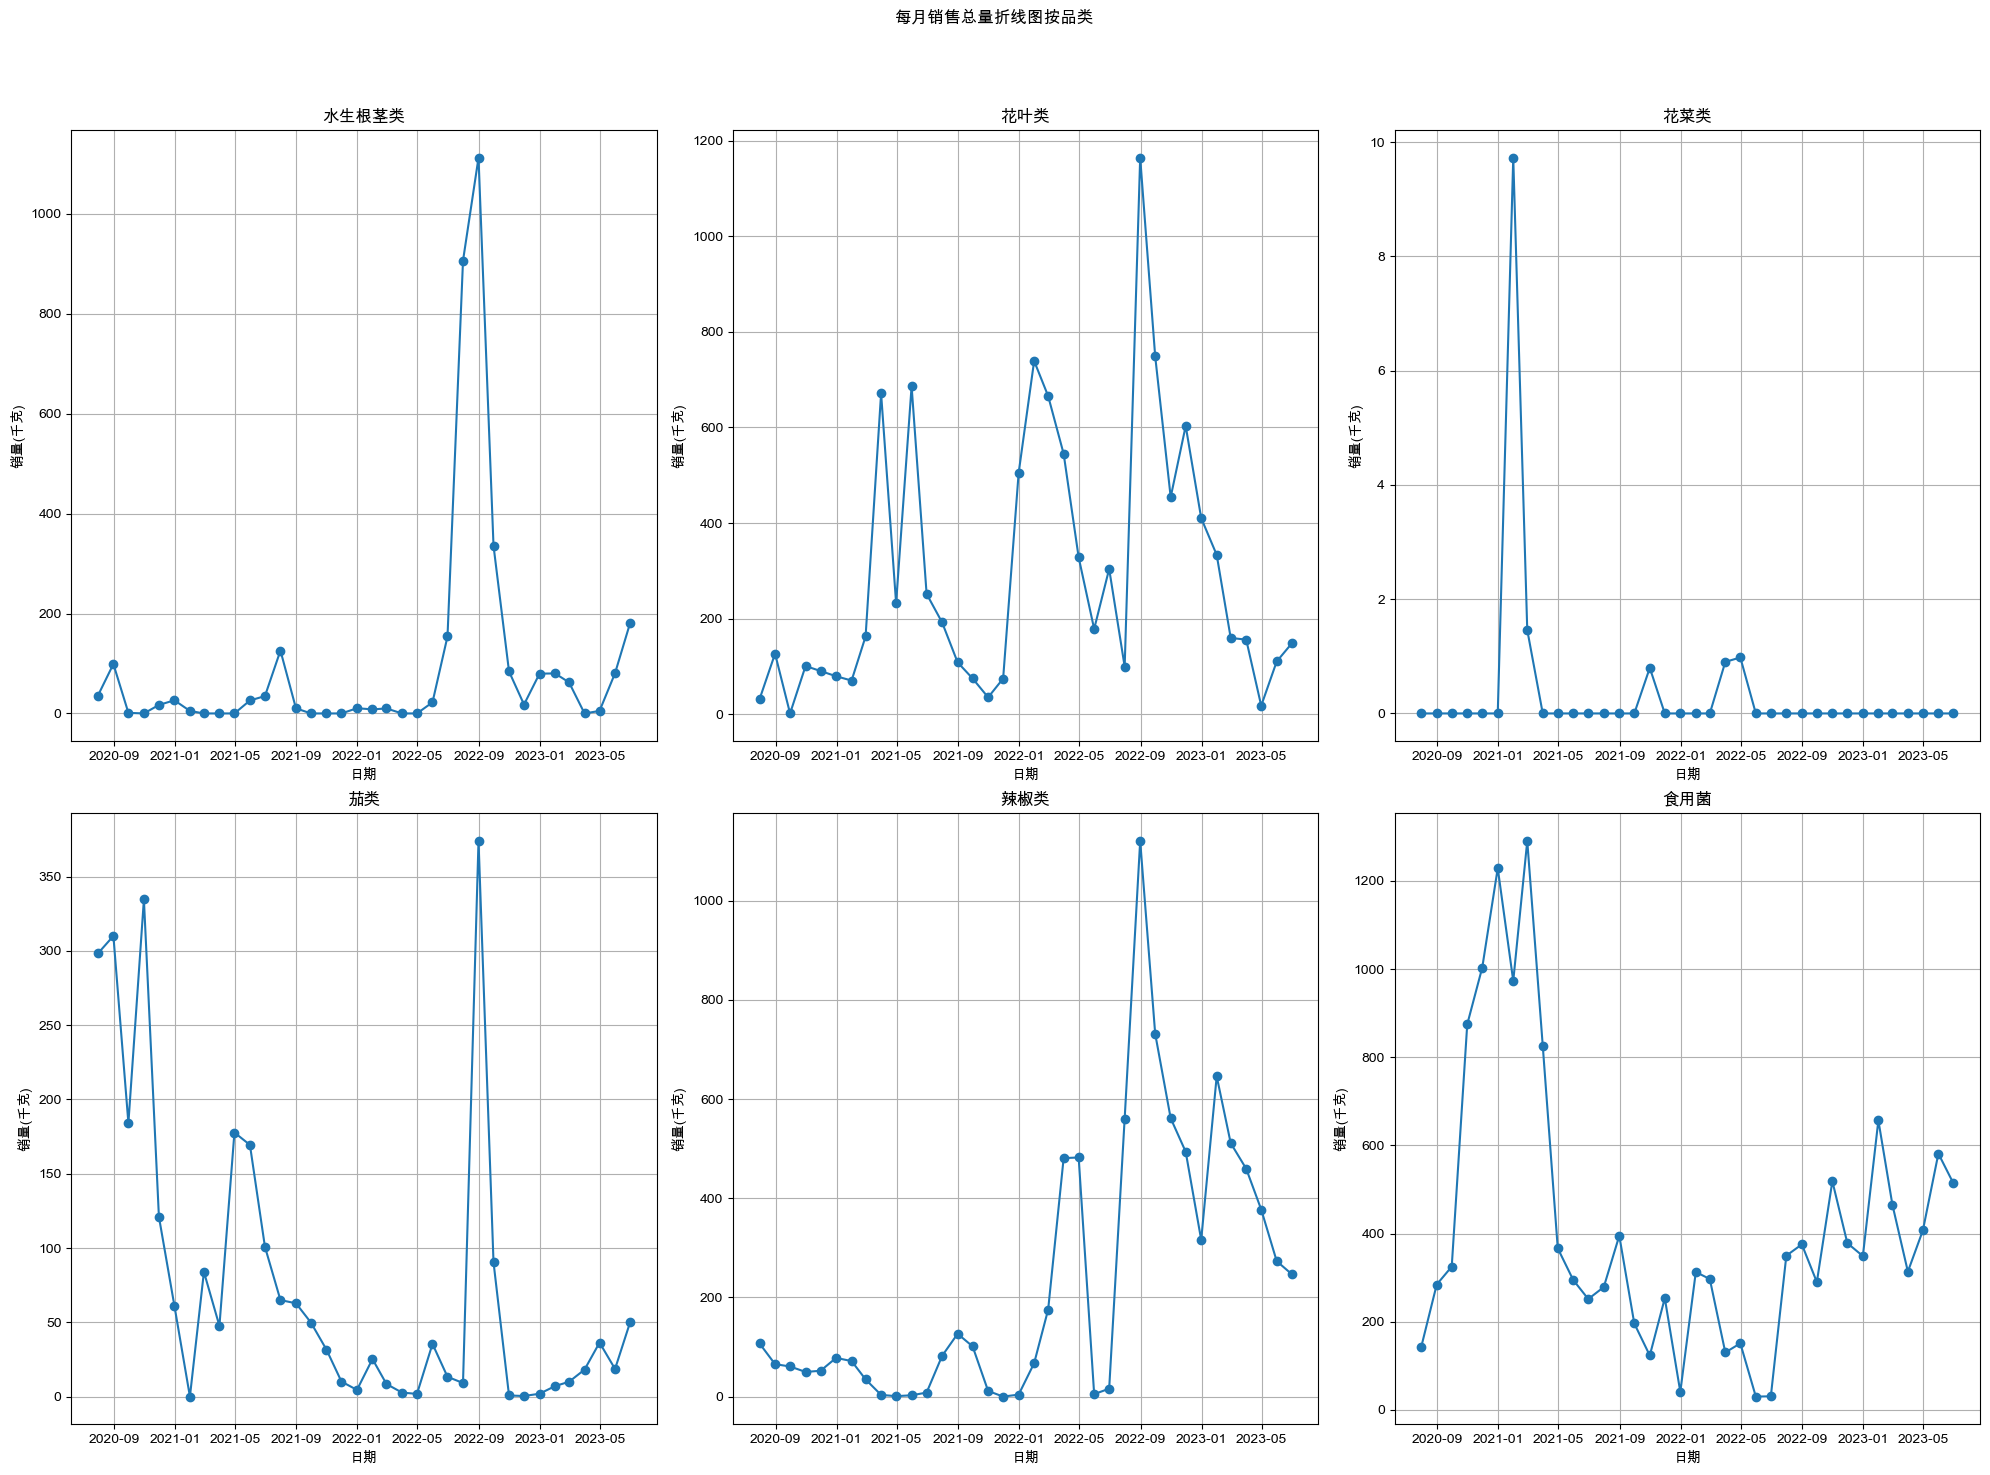

In [22]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

df = category

# 按品类和日期分组并计算每个月的销售总量
monthly_sales = df.groupby(['品类名称', pd.Grouper(key='日期', freq='M')])['销量(千克)'].sum().reset_index()

# 创建一个包含六个子图的图形
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
fig.suptitle('每月销售总量折线图按品类')

# 循环绘制六个品类的折线图
for i, (category, data) in enumerate(monthly_sales.groupby('品类名称')):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    ax.plot(data['日期'], data['销量(千克)'], marker='o', linestyle='-')
    ax.set_title(category)
    ax.set_xlabel('日期')
    ax.set_ylabel('销量(千克)')
    ax.grid(True)

# 调整子图布局
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

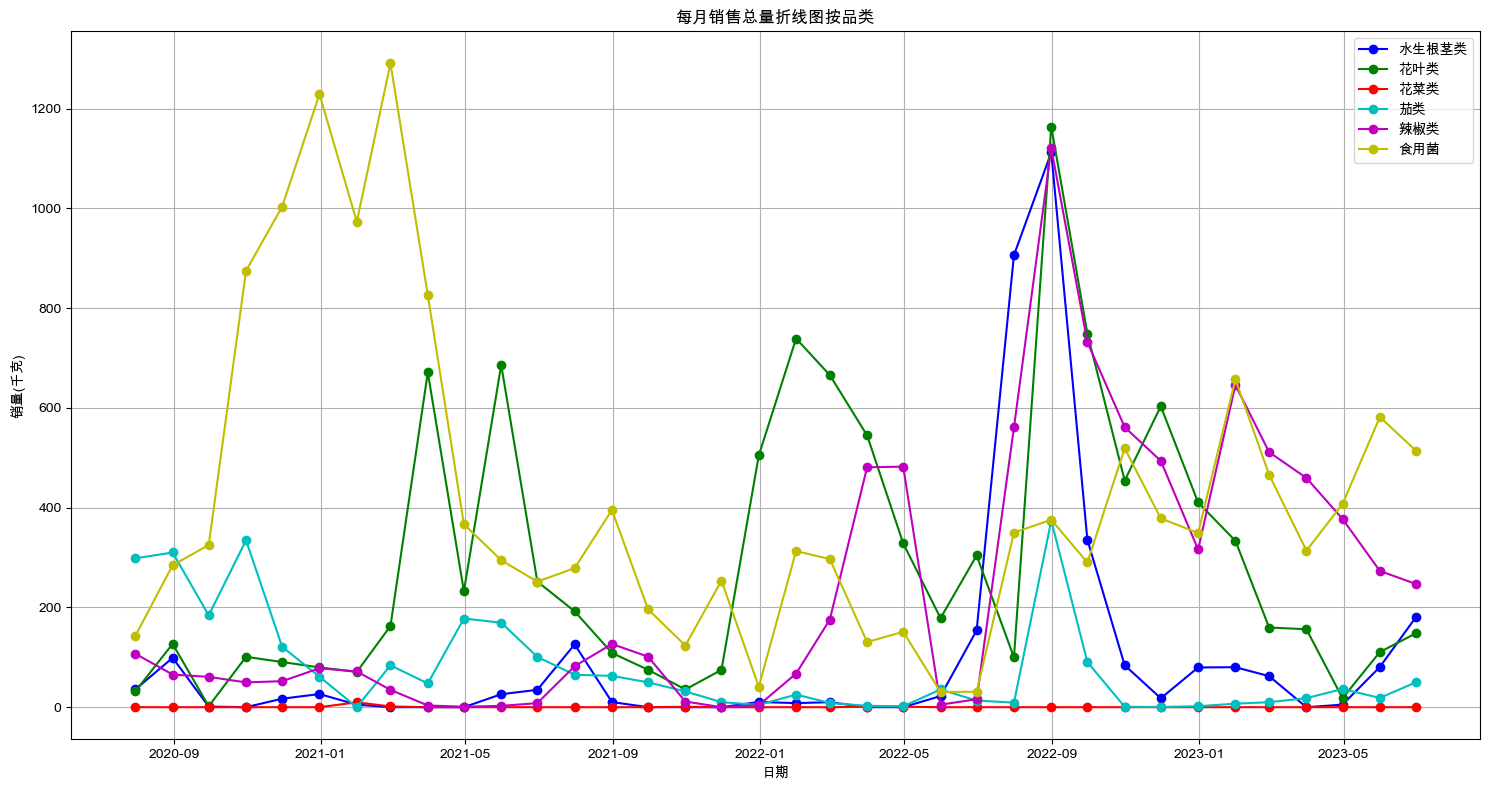

In [23]:
# 按品类和日期分组并计算每个月的销售总量
monthly_sales = df.groupby(['品类名称', pd.Grouper(key='日期', freq='M')])['销量(千克)'].sum().reset_index()

# 创建一个图形
plt.figure(figsize=(15, 8))
plt.title('每月销售总量折线图按品类')

# 使用不同颜色循环绘制六个品类的折线图
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # 可以根据需要选择颜色
for i, (category, data) in enumerate(monthly_sales.groupby('品类名称')):
    plt.plot(data['日期'], data['销量(千克)'], marker='o', linestyle='-', label=category, color=colors[i])

plt.xlabel('日期')
plt.ylabel('销量(千克)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()